Import pandas library to work with DataFrames and nicely viewed tables. 

Import numpy library to work with arrays.

Import Iris Dataset from sklearn library.

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [0]:
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [0]:
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)

In [7]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [0]:
import seaborn as sns

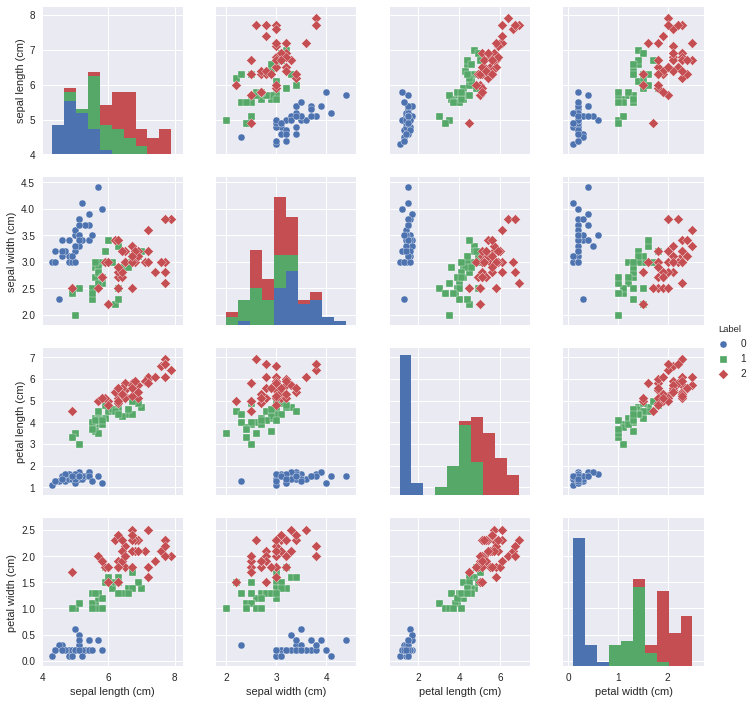

In [20]:
df = iris_dataframe
df['Class']=y_train
sns.pairplot(df,hue='Class',x_vars=["sepal length (cm)","sepal width (cm)","petal length (cm)",	"petal width (cm)"], y_vars=["sepal length (cm)","sepal width (cm)","petal length (cm)",	"petal width (cm)"], markers = ["o","s","D"])

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [0]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [26]:
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [0]:
prediction = knn.predict(X_new)

In [30]:
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']
